### 240828 과제
- 데이터셋 : auto-mpg.csv
- 목적 : 연비예측
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
DATA_FILE = '../data/auto_mpg.csv'
autompg=pd.read_csv(DATA_FILE)

In [4]:
autompg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
autompg.value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model year  origin  car name                            
9.0   8          304.0         193         4732    18.5          70          1       hi 1200d                                1
27.0  4          151.0         90          2950    17.3          82          1       chevrolet camaro                        1
                 140.0         86          2790    15.6          82          1       ford mustang gl                         1
                 112.0         88          2640    18.6          82          1       chevrolet cavalier wagon                1
                 101.0         83          2202    15.3          76          2       renault 12tl                            1
                                                                                                                            ..
18.6  6          225.0         110         3620    18.7          78          1       dodge aspen                    

In [6]:
autompg['kml']=autompg['mpg']*0.425

In [7]:
autompg=autompg.drop(['mpg'],axis=1)

In [8]:
corrdf=pd.concat([autompg['kml'],autompg['cylinders'],autompg['displacement'],autompg['weight'],autompg['acceleration']],axis=1)
corrdf.value_counts()

kml      cylinders  displacement  weight  acceleration
11.4750  4          97.0          2130    14.5            2
3.8250   8          304.0         4732    18.5            1
11.5600  4          119.0         2300    14.7            1
11.4750  4          151.0         2735    18.0            1
                    140.0         2790    15.6            1
                                                         ..
7.9050   6          225.0         3620    18.7            1
7.8625   8          360.0         3940    13.0            1
         6          250.0         3645    16.2            1
                                  3525    19.0            1
19.8050  4          86.0          2110    17.9            1
Name: count, Length: 397, dtype: int64

In [9]:
corrdf.corr()

,kml,cylinders,displacement,weight,acceleration
kml,1.000000,-0.775396,-0.804203,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000


In [10]:
weight=corrdf['weight']
kml=corrdf['kml']

weightDF=pd.DataFrame(weight,columns=['weight'])
kmlSR=pd.Series(kml)

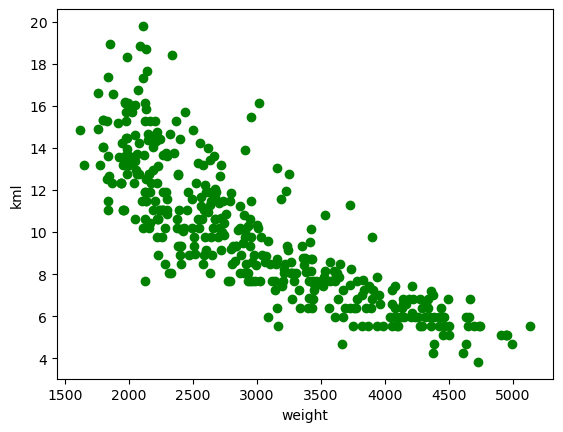

In [11]:
plt.plot(weightDF, kmlSR, 'go')
plt.xlabel('weight')
plt.ylabel('kml')
plt.show()

In [12]:
model=LinearRegression()

In [13]:
model.fit(weightDF, kmlSR)

LinearRegression()

In [14]:
print(f'기울기 : {model.coef_}\n절편 : {model.intercept_}')

기울기 : [-0.00326256]
절편 : 19.684879878612897


In [15]:
pre_kml= model.coef_[0]*weightDF+model.intercept_
pre_kml=pre_kml.values.reshape(-1)

In [16]:
real_kml=kmlSR.to_numpy()
real_kml - pre_kml

array([-6.02872171e-01, -1.26124847e+00, -8.24726202e-01, -1.68451388e+00,
       -1.20731293e+00,  8.52889944e-01,  4.70303214e-01,  3.33275725e-01,
        7.01944923e-01, -7.49026662e-01, -1.68538117e+00, -1.96030345e+00,
       -1.03939444e+00, -3.66662195e+00, -1.74608927e+00, -1.09204945e+00,
       -2.98454044e+00, -2.31963903e+00, -1.26062862e+00, -2.64808361e+00,
       -3.42321490e-01, -1.55686084e+00, -1.31130160e+00, -1.34632245e+00,
       -2.12062291e+00, -3.78168814e-01, -1.15792048e+00, -7.13345126e-01,
       -4.21449379e-01, -1.26062862e+00, -3.98445675e-01, -1.79089781e+00,
       -2.38468360e+00, -3.01629874e+00, -1.66493852e+00, -1.59882004e+00,
       -8.36909145e-01, -1.30758498e+00, -2.76788101e-03,  8.29184735e-01,
       -1.82208641e-01, -3.71437079e-01,  1.58110134e+00,  1.32422645e+00,
        2.60967481e+00, -2.37117930e+00, -2.47863714e+00, -9.02160331e-01,
       -1.79370631e+00, -2.66699828e+00, -8.58466533e-01, -1.68331938e-01,
       -1.97694971e-01, -

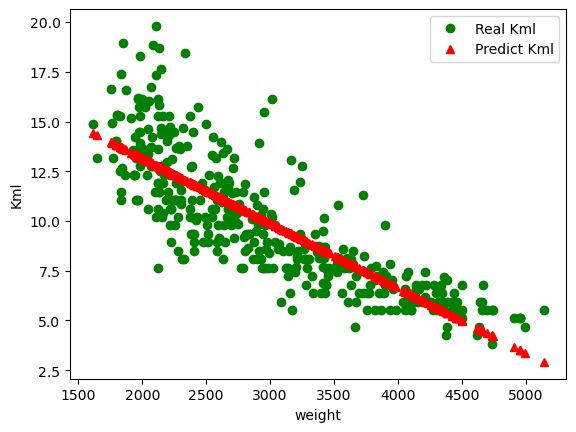

In [17]:
# 현재 데이터의 분포 확인

plt.plot(weightDF, kmlSR, 'go', label='Real Kml')
plt.plot(weightDF, pre_kml, 'r^', label='Predict Kml')
plt.xlabel('weight')
plt.ylabel('Kml')
plt.legend()
plt.show()

In [18]:
model.score(weightDF, kmlSR)

0.6917929800341573

In [20]:
# 성능지표 => 오차계산과 결정계수 계산
pre_kml=model.predict(weightDF)

# 손실/비용 계산 함수 => 정답과 예측값
mse=mean_squared_error(kmlSR, pre_kml)
rmse=mean_squared_error(kmlSR, pre_kml, squared=False)
mae=mean_absolute_error(kmlSR, pre_kml)

# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표 => 정답과 예측값 제공 : 1에 가까울 수록 좋음
r2=r2_score(kmlSR, pre_kml)

In [21]:
# 손실/비용함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 3.392307239567254
rmse : 1.841821717639157
mae : 1.3994352372485734
r2 : 0.6917929800341573
